In [4]:
# Вариант
gamma = 5/3 
alpha = 0.05
n = 8
M = 10
rho3 = 0.5

# Параметры разбиения
Nx, Ny = 20, 40
Nt = 30
T = 0.075

# В какие три момента времени строить графики
plot_time1, plot_time2, plot_time3 = 1, 9, 29

Смоделируем развитие гидродинамической неустойчивости с помощью численных методов. Модель описывается следующей системой уравнений:
$$
\begin{cases}
\frac{\partial\rho}{\partial t} + \frac{\partial(\rho u)}{\partial x} + \frac{\partial(\rho v)}{\partial y} = 0,\\
\frac{\partial(\rho u)}{\partial t} + \frac{\partial(\rho u^2+p)}{\partial x} + \frac{\partial(\rho uv)}{\partial y} = 0,\\
\frac{\partial(\rho v)}{\partial t} + \frac{\partial(\rho uv)}{\partial x} + \frac{\partial(\rho v^2+p)}{\partial y} = 0,\\
\frac{\partial(\rho(\varepsilon+\frac{u^2+v^2}{2}))}{\partial t} + \frac{\partial}{\partial x}((\rho(\varepsilon+\frac{u^2+v^2}{2})+p)u) + \frac{\partial}{\partial y}((\rho(\varepsilon+\frac{u^2+v^2}{2})+p)v) = 0.
\end{cases}
$$

Задача решается на прямоугольнике $0\leq x\leq 1, 0\leq y\leq 2$.

Краевые условия заданы следующим образом:
* На левой, правой и нижней границе задан нулевой поток,
* На верхней границе задан равномерный поток.

Начальные условия заданы следующим образом: прямоугольник разбивается на три области
* Первая область: $y > 1.5$,
* Вторая область: $\alpha\cos(n\pi x)+0.7 < y < 1.5$,
* Третья область: $y < \alpha\cos(n\pi x)+0.7$.

$y = 1.5$ - ударная волна. Число Маха $M$ данной волны задано. $\alpha\cos(n\pi x)+0.7$ - контактный разрыв.

$\alpha$ и $n$ - заданные параметры. В каждой области гидродинамические величины константны и равны $\rho_1, u_1, v_1, \varepsilon_1, \rho_2, u_2, v_2, \varepsilon_2, \rho_3, u_3, v_3, \varepsilon_3$. Величины $u_1, u_2, u_3, v_2, v_3$ равны нулю, величины $\rho_2, \varepsilon_2$ равны единице, $\rho_3$ задана. Значение $\varepsilon_3$ можно выразить из условия равенства давления.

$$p_2 = p_3$$
$$(\gamma-1)\rho_2\varepsilon_2 = (\gamma-1)\rho_3\varepsilon_3$$
$$\varepsilon_3 = \frac{\rho_2\varepsilon_2}{\rho_3}$$

Значения $\rho_1, u_1, v_1, \varepsilon_1$ выражаются из соотношений Гюгонио.

$$\rho_1 v_1 - \rho_2 v_2 = D(\rho_1 - \rho_2),$$
$$\rho_1 v_1^2 + p_1 - \rho_2 v_2^2 - p_2 = D(\rho_1 v_1 - \rho_2 v_2),$$
$$v_1\left(\rho_1\varepsilon_1 + \rho_1\frac{v_1^2}{2} + p_1\right) - v_2\left(\rho_2\varepsilon_2 + \rho_2\frac{v_2^2}{2} + p_2\right) = D\left(\rho_1\varepsilon_1 + \rho_1\frac{v_1^2}{2} - \rho_2\varepsilon_2 - \rho_2\frac{v_2^2}{2}\right)$$

Скорость движения ударной волны равна $D=c_2 M, c_2=\sqrt{\gamma(\gamma-1)\varepsilon_2}$.

Если подставить $v_2=0$ в соотношения, то они значительно упрощаются:

$$\rho_1 v_1 = D(\rho_1 - \rho_2),$$
$$\rho_1 v_1^2 + p_1 - p_2 = D\rho_1 v_1,$$
$$v_1\left(\rho_1\varepsilon_1 + \rho_1\frac{v_1^2}{2} + p_1\right) = D\left(\rho_1\varepsilon_1 + \rho_1\frac{v_1^2}{2} - \rho_2\varepsilon_2\right)$$

Выразим $\rho_1, v_1, \varepsilon_1$ из данных соотношений. Выразим $\rho_1$ через $v_1$:

$$\rho_1 v_1 = D(\rho_1 - \rho_2)$$
$$\rho_1 v_1 = D\rho_1 - D\rho_2$$
$$D\rho_2 = D\rho_1 - v_1\rho_1$$
$$(D-v_1)\rho_1=D\rho_2$$
$$\rho_1=\frac{D\rho_2}{D-v_1}$$

Выразим $\varepsilon_1$ через $v_1$:
$$\rho_1 v_1^2 + p_1 - p_2 = D\rho_1 v_1$$
$$\rho_1 v_1^2 + (\gamma-1)\rho_1\varepsilon_1 - (\gamma-1)\rho_2\varepsilon_2 = D\rho_1 v_1$$
$$(\gamma-1)\rho_1\varepsilon_1 = D\rho_1 v_1 - \rho_1 v_1^2 + (\gamma-1)\rho_2\varepsilon_2$$
$$(\gamma-1)\rho_1\varepsilon_1 = (D - v_1)\rho_1 v_1 + (\gamma-1)\rho_2\varepsilon_2$$

Подставим выражение $\rho_1$:
$$\frac{(\gamma-1)D\rho_2}{D-v_1}\varepsilon_1 = D\rho_2 v_1 + (\gamma-1)\rho_2\varepsilon_2$$
$$\frac{\gamma-1}{D-v_1}\varepsilon_1 = v_1 + \frac{\gamma-1}{D}\varepsilon_2$$

Переобозначим $B=\frac{\gamma-1}{D}\varepsilon_2$. Это упростит вычисления в дальнейшем.

$$\frac{\gamma-1}{D-v_1}\varepsilon_1 = v_1 + B$$
$$\varepsilon_1 = \frac{(D-v_1)(v_1 + B)}{\gamma-1}$$

Найдём значение $v_1$ из третьего соотношения:

$$v_1\left(\rho_1\varepsilon_1 + \rho_1\frac{v_1^2}{2} + p_1\right) = D\left(\rho_1\varepsilon_1 + \rho_1\frac{v_1^2}{2} - \rho_2\varepsilon_2\right)$$
$$v_1\left(\rho_1\varepsilon_1 + \rho_1\frac{v_1^2}{2} + (\gamma-1)\rho_1\varepsilon_1\right) = D\left(\rho_1\varepsilon_1 + \rho_1\frac{v_1^2}{2} - \rho_2\varepsilon_2\right)$$
$$v_1\left(\rho_1\frac{v_1^2}{2} + \gamma\rho_1\varepsilon_1\right) = D\left(\rho_1\varepsilon_1 + \rho_1\frac{v_1^2}{2} - \rho_2\varepsilon_2\right)$$

Подставим $\rho_1$ и $\varepsilon_1$:

$$\rho_1\varepsilon_1 = \frac{D\rho_2}{D-v_1}\frac{(D-v_1)(v_1 + B)}{\gamma-1} = \frac{D\rho_2(v_1 + B)}{\gamma-1}$$

$$v_1\left(\frac{D\rho_2 v_1^2}{2(D-v_1)} + \frac{\gamma D\rho_2(v_1 + B)}{\gamma-1}\right) = D\left(\frac{D\rho_2(v_1 + B)}{\gamma-1} + \frac{D\rho_2 v_1^2}{2(D-v_1)} - \rho_2\varepsilon_2\right)$$

$$\frac{D\rho_2 v_1^3}{2(D-v_1)} + \frac{\gamma Dv_1\rho_2(v_1 + B)}{\gamma-1} = \frac{D^2\rho_2(v_1 + B)}{\gamma-1} + \frac{D^2\rho_2 v_1^2}{2(D-v_1)} - D\rho_2\varepsilon_2$$

$$\frac{\gamma D\rho_2 v_1^2}{\gamma-1} + \frac{\gamma BD\rho_2 v_1}{\gamma-1} + D\rho_2\varepsilon_2 =
\frac{D^2\rho_2 v_1}{\gamma-1} + \frac{\frac{(\gamma-1)\varepsilon_2}{D}D^2\rho_2}{\gamma-1} + D\frac{D\rho_2 v_1^2}{2(D-v_1)} - v_1\frac{D\rho_2 v_1^2}{2(D-v_1)}$$

$$\frac{\gamma D\rho_2 v_1^2}{\gamma-1} + \frac{\gamma \frac{(\gamma-1)\varepsilon_2}{D}D\rho_2 v_1}{\gamma-1} - \frac{D^2\rho_2 v_1}{\gamma-1} + D\rho_2\varepsilon_2 = D\rho_2\varepsilon_2 + \frac{D(D-v_1)\rho_2 v_1^2}{2(D-v_1)}$$

$$\frac{\gamma D\rho_2 v_1^2}{\gamma-1} + \gamma\rho_2\varepsilon_2 v_1 - \frac{D^2\rho_2 v_1}{\gamma-1} = \frac{D\rho_2 v_1^2}{2}$$

$$\left(\left(\frac{\gamma D}{\gamma-1} - \frac{D}{2}\right)v_1 + \gamma\varepsilon_2 - \frac{D^2}{\gamma-1}\right)v_1 = 0$$

Если $v_1=0$, то $\rho_1=\frac{D\rho_2}{D-v_1}=\rho_2$. Для устойчивости ударной волны необходимо $\rho_1 > \rho_2$, потому данное решение не подходит. Следовательно, $v_1\neq 0$.

$$\left(\frac{\gamma D}{\gamma-1} - \frac{D}{2}\right)v_1 + \gamma\varepsilon_2 - \frac{D^2}{\gamma-1} = 0$$
$$\left(\frac{\gamma D}{\gamma-1} - \frac{D}{2}\right)v_1 = \frac{D^2}{\gamma-1} - \gamma\varepsilon_2$$
$$\left(\gamma D - \frac{D(\gamma-1)}{2}\right)v_1 = D^2 - \gamma(\gamma-1)\varepsilon_2$$
$$\left(2\gamma D - \gamma D + D\right)v_1 = 2D^2 - 2\gamma(\gamma-1)\varepsilon_2$$
$$D(\gamma + 1)v_1 = 2D^2 - 2\gamma(\gamma-1)\varepsilon_2$$

$$v_1 = \frac{2(D^2 - \gamma(\gamma-1)\varepsilon_2)}{D(\gamma+1)}$$

Проверим условие $\rho_1 > \rho_2$:

$$\frac{D\rho_2}{D-v_1}>\rho_2$$
$$\frac{D}{D-v_1}>1$$

Чтобы дробь была положительной, необходимо $v_1 < D$.

$$D>D-v_1$$
$$0>-v_1$$
$$v_1>0$$

Итого, $0<v_1<D$. Проверим, что полученное $v_1$ удовлетворяет данным ограничениям.

$$\frac{2(D^2 - \gamma(\gamma-1)\varepsilon_2)}{D(\gamma+1)} < D$$
$$2(D^2 - \gamma(\gamma-1)\varepsilon_2) < D^2(\gamma+1)$$
$$2c_2^2 M^2 - 2\gamma(\gamma-1)\varepsilon_2 < c_2^2 M^2(\gamma+1)$$
$$2\gamma(\gamma-1)\varepsilon_2 M^2 - 2\gamma(\gamma-1)\varepsilon_2 < \gamma(\gamma-1)(\gamma+1)\varepsilon_2 M^2$$
$$2 M^2 - 2 < (\gamma+1) M^2$$
$$(\gamma+1) M^2 - 2M^2 > -2$$
$$(\gamma-1) M^2 > -2$$

Показатель адиабаты $\gamma>1$, потому выражение в левой части положительно. $v_1<D$ выполняется.

$$\frac{2(D^2 - \gamma(\gamma-1)\varepsilon_2)}{D(\gamma+1)} > 0$$
$$D^2 - \gamma(\gamma-1)\varepsilon_2 > 0$$
$$c_2^2 M^2 - \gamma(\gamma-1)\varepsilon_2 > 0$$
$$\gamma(\gamma-1)\varepsilon_2 M^2 - \gamma(\gamma-1)\varepsilon_2 > 0$$
$$M^2 - 1 > 0$$
$$M^2 > 1$$

Число Маха $M>1$, потому неравенство выполняется. $v_1>0$ выполняется. Значит, найденное значение $v_1$ удовлетворяет условиям устойчивости. Зная значение $v_1$, можно вычислить значения $\rho_1$ и $\varepsilon_1$ по формулам, выписанным ранее.

Построим сетку на области интегрирования. Сетка выбирается так, чтобы число разбиений по оси Y было кратно десяти. Таким образом, ударная волна проходит по границе сетки. Значения гидродинамических величин в ячейках вычисляются следующим образом:

1) Если ордината центра ячейки больше 1.5, то задаём значения $\rho=\rho_1, u=0, v=v_1, \varepsilon=\varepsilon_1$.

2) Если ордината центра ячейки меньше 1.5, то вычисляем площадь $V_3$ под косинусом $\alpha\cos(n\pi x)+0.7$ внутри ячейки, $V_2 = \Delta x\Delta y$. Так как $u_2=u_3=0$ и $v_2=v_3=0$, то задаём значения скоростей $u=0, v=0$. Найдём значения $\rho$ и $\varepsilon$. Из закона сохранения массы получаем:

$$\rho\Delta x\Delta y = \rho_2 V_2 + \rho_3 V_3$$
$$\rho = \frac{\rho_2 V_2 + \rho_3 V_3}{\Delta x\Delta y}$$

Из закона сохранения энергии получаем:

$$\rho\varepsilon\Delta x\Delta y = \rho_2\varepsilon_2 V_2 + \rho_3\varepsilon_3 V_3$$
$$\varepsilon = \frac{\rho_2\varepsilon_2 V_2 + \rho_3\varepsilon_3 V_3}{\rho\Delta x\Delta y}$$

Вычислим площадь под косинусом $a\cos(wx)+b$ внутри прямоугольника $x_1\leq x\leq x_2, y_1\leq y\leq y_2$. Построим абсциссы $p_0 < p_1 < ... < p_n$, где $p_0 = x_1, p_n = x_2$, а $p_1,p_2,...,p_{n-1}$ - абсциссы точек пересечения косинуса с прямыми $y=y_1$ и $y=y_2$. Внутри каждого отрезка $[p_i, p_{i+1}]$ косинус не пересекает прямые $y=y_1$ и $y=y_2$, что позволяет вычислить площадь под косинусом внутри прямоугольника $p_i\leq x\leq p_{i+1}, y_1\leq y\leq y_2$ следующим образом:

1) Вычисляем значение косинуса в середине отрезка $\frac{p_i+p_{i+1}}{2}$.

2) Если значение косинуса меньше $y_1$, значит косинус целиком проходит под прямоугольником, потому площадь равна 0.

3) Если значение косинуса больше $y_2$, значит косинус целиком проходит над прямоугольником, потому площадь равна площади прямоугольника $(p_{i+1}-p_i)(y_2-y_1)$.

4) Если значение косинуса лежит в пределах от $y_1$ до $y_2$, то косинус проходит внутри прямоугольника, потому площадь считается как интеграл:

$$S = \int\limits_{p_i}^{p_{i+1}} (a\cos(wx)+b-y_1)dx = \frac{a}{w}(\sin(wp_{i+1})-\sin(wp_i)) + (p_{i+1}-p_i)(b-y_1).$$

Итоговая площадь считается как сумма площадей на каждом отрезке.

Подключим необходимые для вычислений библиотеки:

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import math

Напишем функцию, вычисляющую площадь по описанному алгоритму:

In [6]:
# площадь под косинусом a*cos(w*x)+b внутри прямоугольника x1<=x<=x2, y1<=y<=y2
def cos_area(x1, y1, x2, y2, a, b, w):
    # точки пересечения косинуса с прямой y
    def intersect(y):
        # a*cos(w*x)+b=y
        # cos(w*x)=(y-b)/a
        # x = +-arccos((y-b)/a)/w + 2*pi*n/w
        cx = (y - b) / a
        if abs(cx) >= 1: # нет точек пересечения
            return []
        
        # найдём точки, лежащие в отрезке [x1, x2]
        points = [ (i * math.acos(cx) - 2 * math.pi) / w for i in [ -1, 1 ] ]
        ret_points = []
        
        for p in points:
            while p < x2:
                if p > x1:
                    ret_points.append(p)
                p += 2 * math.pi / w
        
        return ret_points
    
    # все точки пересечения
    points = [x1, x2] + intersect(y1) + intersect(y2)
    points.sort()
    
    # считаем площадь
    area = 0
    
    for i in range(len(points) - 1):
        p1, p2 = points[i], points[i + 1]
        p = 0.5 * (p1 + p2)
        fp = a * math.cos(w * p) + b
        
        # пустая область
        if fp < y1:
            continue
        # частично заполненная область
        elif fp < y2:
            area += a / w * (math.sin(w * p2) - math.sin(w * p1)) + (p2 - p1) * (b - y1)
        # полностью заполненная область
        else:
            area += (p2 - p1) * (y2 - y1)
        
    return area

Численное интегрирование будем проводить по следующей схеме:
$$\frac{\partial\varphi_{i,j}}{\partial t} + \frac{F^x_{i+\frac{1}{2},j} - F^x_{i-\frac{1}{2},j}}{\Delta x} + \frac{F^y_{i,j+\frac{1}{2}} - F^y_{i,j-\frac{1}{2}}}{\Delta y} = 0.$$

В схеме первого порядка точности по пространству потоки на границах считаются следующим образом:
$$F^x_{i+\frac{1}{2},j} = \frac{F^x_{i,j} + F^x_{i+1,j}}{2} - c_{i+\frac{1}{2},j}\frac{\varphi_{i+1,j} - \varphi_{i,j}}{2},$$
$$c_{i+\frac{1}{2},j} = \max(c_{i,j}+|u_{i,j}|,c_{i+1,j}+|u_{i+1,j}|).$$

В схеме второго порядка точности используются следующие величины:
$$\varphi^-_{i+\frac{1}{2},j} = \varphi_{i,j} + \alpha(R^-)\frac{\varphi_{i+1,j}-\varphi_{i,j}}{2},$$
$$\varphi^+_{i+\frac{1}{2},j} = \varphi_{i+1,j} - \alpha(R^+)\frac{\varphi_{i+2,j}-\varphi_{i+1,j}}{2},$$
$$R^- = \frac{\varphi_{i,j}-\varphi_{i-1,j}}{\varphi_{i+1,j}-\varphi_{i,j}}, R^+ = \frac{\varphi_{i+1,j}-\varphi_{i,j}}{\varphi_{i+2,j}-\varphi_{i+1,j}},$$

$$\alpha(R)=\begin{cases}
0, R<0,\\R, 0\leq R\leq 1,\\1, R>1.
\end{cases}$$

Вместо величин $i,j$ подставляем величины, вычисленные по $\varphi^-_{i+\frac{1}{2},j}$, а вместо $i+1,j$ - вычисленные по $\varphi^+_{i+\frac{1}{2},j}$. Потоки $F^x_{i-\frac{1}{2},j}, F^y_{i,j+\frac{1}{2}}, F^y_{i,j-\frac{1}{2}}$ считаются аналогично.

В схеме первого порядка точности по времени производная аппроксимируется как разность:
$$\frac{\varphi^{n+1}_{i,j} - \varphi^{n}_{i,j}}{\Delta t} + \frac{F^{x,n}_{i+\frac{1}{2},j} - F^{x,n}_{i-\frac{1}{2},j}}{\Delta x} + \frac{F^{y,n}_{i,j+\frac{1}{2}} - F^{y,n}_{i,j-\frac{1}{2}}}{\Delta y} = 0.$$

В схеме второго порядка $\varphi^{n+1}_{i,j}$ считается следующим образом:
$$\frac{\varphi^{n+0.5}_{i,j} - \varphi^{n}_{i,j}}{0.5\Delta t} + \frac{F^{x,n}_{i+\frac{1}{2},j} - F^{x,n}_{i-\frac{1}{2},j}}{\Delta x} + \frac{F^{y,n}_{i,j+\frac{1}{2}} - F^{y,n}_{i,j-\frac{1}{2}}}{\Delta y} = 0,$$
$$\frac{\varphi^{n+1}_{i,j} - \varphi^{n}_{i,j}}{\Delta t} + \frac{F^{x,n+0.5}_{i+\frac{1}{2},j} - F^{x,n+0.5}_{i-\frac{1}{2},j}}{\Delta x} + \frac{F^{y,n+0.5}_{i,j+\frac{1}{2}} - F^{y,n+0.5}_{i,j-\frac{1}{2}}}{\Delta y} = 0.$$


In [7]:
# преобразование в phi и обратно
def to_phi(nrho, nu, nv, neps, k, i, j):
    rho, u, v, eps = nrho[k, i, j], nu[k, i, j], nv[k, i, j], neps[k, i, j]
    return np.array([rho, rho * u, rho * v, rho * (eps + 0.5 * (u * u + v * v))])

def from_phi(phi):
    rho = phi[0]
    u = phi[1] / rho
    v = phi[2] / rho
    eps = phi[3] / rho - 0.5 * (u * u + v * v)
    return rho, u, v, eps

# потоки
def get_Fx(gamma, phi):
    rho, u, v, eps = from_phi(phi)
    P = (gamma - 1) * rho * eps
    E = rho * (eps + 0.5 * (u * u + v * v))
    return np.array([ rho * u, rho * u * u + P, rho * u * v, (E + P) * u ])

def get_Fy(gamma, phi):
    rho, u, v, eps = from_phi(phi)
    P = (gamma - 1) * rho * eps
    E = rho * (eps + 0.5 * (u * u + v * v))
    return np.array([ rho * v, rho * u * v, rho * v * v + P, (E + P) * v ])

In [8]:
# потоки на границах
def get_F_half(phi_m1, phi_p1, phi_m, phi_p, gamma, vert):
    # параметры
    rho_m1, u_m1, v_m1, eps_m1 = from_phi(phi_m1)
    rho_p1, u_p1, v_p1, eps_p1 = from_phi(phi_p1)
    rho_m, u_m, v_m, eps_m = from_phi(phi_m)
    rho_p, u_p, v_p, eps_p = from_phi(phi_p)
    
    s_m1 = v_m1 if vert else u_m1
    s_p1 = v_p1 if vert else u_p1
    s_m = v_m if vert else u_m
    s_p = v_p if vert else u_p

    # скорости звука
    c_m1 = math.sqrt(gamma * (gamma - 1) * eps_m1)
    c_p1 = math.sqrt(gamma * (gamma - 1) * eps_p1)
    c_m = math.sqrt(gamma * (gamma - 1) * eps_m)
    c_p = math.sqrt(gamma * (gamma - 1) * eps_p)

    c_mh = max(c_m1 + abs(s_m1), c_m + abs(s_m))
    c_ph = max(c_p1 + abs(s_p1), c_p + abs(s_p))

    # потоки
    get_F = get_Fy if vert else get_Fx
    
    F_m1 = get_F(gamma, phi_m1)
    F_p1 = get_F(gamma, phi_p1)
    F_m = get_F(gamma, phi_m)
    F_p = get_F(gamma, phi_p)
    
    F_mh = 0.5 * (F_m1 + F_m - c_mh * (phi_m1 - phi_m))
    F_ph = 0.5 * (F_p + F_p1 - c_ph * (phi_p - phi_p1))
    return F_mh, F_ph

In [9]:
# функция alpha(R) поэлементно
def alpha_all(R1, R2):
    R = np.zeros_like(R1)
    for i in range(R.shape[0]):
        if R2[i] != 0:
            R[i] = R1[i] / R2[i]
            if R[i] < 0: R[i] = 0
            elif R[i] > 1: R[i] = 1
    return R

# вычисление точки на правой границе со вторым порядком точности
def border2(phi_m, phi, phi_p, phi_2p):
    aRm = alpha_all(phi - phi_m, phi_p - phi)
    aRp = alpha_all(phi_p - phi, phi_2p - phi_p)
    
    phi_hm = phi + 0.5 * aRm * (phi_p - phi)
    phi_hp = phi_p - 0.5 * aRp * (phi_2p - phi_p)
    return phi_hm, phi_hp

In [10]:
def solve(orderXY, orderT, Nx, Ny, Nt, T, gamma, rho2, eps2, rho3, M, alpha, n):
    rho = np.zeros(shape=(Nt + orderT - 1, Nx + 4, Ny + 4))
    u = np.zeros(shape=(Nt + orderT - 1, Nx + 4, Ny + 4))
    v = np.zeros(shape=(Nt + orderT - 1, Nx + 4, Ny + 4))
    eps = np.zeros(shape=(Nt + orderT - 1, Nx + 4, Ny + 4))
    
    dx, dy, dt = 1.0 / Nx, 2.0 / Ny, T / Nt
    
    # начальные условия
    eps3 = rho2 * eps2 / rho3
    
    c2 = math.sqrt(gamma * (gamma - 1) * eps2)
    D = c2 * M
    B = (gamma - 1) * eps2 / D
    
    v1 = 2 * (D * D - gamma * (gamma - 1) * eps2) / (D * (gamma + 1))
    rho1 = D * rho2 / (D - v1)
    eps1 = (v1 + B) * (D - v1) / (gamma - 1)
    v1 = -v1
    
    for i in range(2, Nx + 2):
        for j in range(2, Ny + 2):
            x, y = (i - 2 + 0.5) * dx, (j - 2 + 0.5) * dy
            # контактный разрыв
            if y < 1.5:
                V = dx * dy
                V3 = cos_area(x - 0.5 * dx, y - 0.5 * dy, x + 0.5 * dx, y + 0.5 * dy, alpha, 0.7, n * math.pi)
                V2 = V - V3
                rho[0, i, j] = (rho2 * V2 + rho3 * V3) / V
                eps[0, i, j] = (rho2 * V2 * eps2 + rho3 * V3 * eps3) / (V * rho[0, i, j])
            # ударная волна
            else:
                rho[0, i, j] = rho1
                v[0, i, j] = v1
                eps[0, i, j] = eps1
    
    
    # вычисление следующих моментов времени
    k0, k = -1, orderT - 2
    for repeat in range(0, orderT * (Nt - 1)):
        print(int(100 * repeat / (orderT * (Nt - 1))), '%')
        
        if orderT == 1:
            k0 += 1
            k += 1
        elif k0 == k:
            k = -1
        else:
            k0 += 1
            k = k0
        
        # краевые условия
        for j in range(2, Ny + 2):
            for i in range(2):
                # слева
                rho[k, i, j] = rho[k, 3 - i, j]
                u[k, i, j] = -u[k, 3 - i, j]
                v[k, i, j] = v[k, 3 - i, j]
                eps[k, i, j] = eps[k, 3 - i, j]
                # справа
                rho[k, Nx + 2 + i, j] = rho[k, Nx + 1 - i, j]
                u[k, Nx + 2 + i, j] = -u[k, Nx + 1 - i, j]
                v[k, Nx + 2 + i, j] = v[k, Nx + 1 - i, j]
                eps[k, Nx + 2 + i, j] = eps[k, Nx + 1 - i, j]
        
        for i in range(2, Nx + 2):
            for j in range(2):
                # снизу
                rho[k, i, j] = rho[k, i, 3 - j]
                u[k, i, j] = u[k, i, 3 - j]
                v[k, i, j] = -v[k, i, 3 - j]
                eps[k, i, j] = eps[k, i, 3 - j]
                # сверху
                rho[k, i, Ny + 2 + j] = rho1
                u[k, i, Ny + 2 + j] = 0
                v[k, i, Ny + 2 + j] = v1
                eps[k, i, Ny + 2 + j] = eps1
                
        # следующие значения
        for i in range(2, Nx + 2):
            for j in range(2, Ny + 2):
                # текущее значение phi
                phi1 = to_phi(rho, u, v, eps, k0, i, j)
                
                # вычисляем потоки на границах
                phi = to_phi(rho, u, v, eps, k, i, j)
                phi_mx = to_phi(rho, u, v, eps, k, i - 1, j)
                phi_px = to_phi(rho, u, v, eps, k, i + 1, j)
                phi_my = to_phi(rho, u, v, eps, k, i, j - 1)
                phi_py = to_phi(rho, u, v, eps, k, i, j + 1)
                
                if orderXY == 2:
                    phi_2mx = to_phi(rho, u, v, eps, k, i - 2, j)
                    phi_2px = to_phi(rho, u, v, eps, k, i + 2, j)
                    phi_2my = to_phi(rho, u, v, eps, k, i, j - 2)
                    phi_2py = to_phi(rho, u, v, eps, k, i, j + 2)
                    
                    phi_hmx_m, phi_hmx_p = border2(phi_2mx, phi_mx, phi, phi_px)
                    phi_hpx_m, phi_hpx_p = border2(phi_mx, phi, phi_px, phi_2px)
                    phi_hmy_m, phi_hmy_p = border2(phi_2my, phi_my, phi, phi_py)
                    phi_hpy_m, phi_hpy_p = border2(phi_my, phi, phi_py, phi_2py)
                    
                    F_mhx, F_phx = get_F_half(phi_hmx_p, phi_hpx_m, phi_hmx_m, phi_hpx_p, gamma, False)
                    F_mhy, F_phy = get_F_half(phi_hmy_p, phi_hpy_m, phi_hmy_m, phi_hpy_p, gamma, True)
                else:
                    F_mhx, F_phx = get_F_half(phi, phi, phi_mx, phi_px, gamma, False)
                    F_mhy, F_phy = get_F_half(phi, phi, phi_my, phi_py, gamma, True)
                
                # вычисляем новое значение phi
                mult = 0.5 if k == k0 and orderT == 2 else 1
                phi2 = phi1 - mult * dt / dx * (F_phx - F_mhx) - mult * dt / dy * (F_phy - F_mhy)
                
                # выражаем параметры
                kw = -1 if k == k0 and orderT == 2 else k0 + 1
                rho[kw, i, j], u[kw, i, j], v[kw, i, j], eps[kw, i, j] = from_phi(phi2)
    
    # убираем границы и вспомогательный слой
    print('Done!')
    return rho[:Nt, 2:Nx+2, 2:Ny+2], u[:Nt, 2:Nx+2, 2:Ny+2], v[:Nt, 2:Nx+2, 2:Ny+2], eps[:Nt, 2:Nx+2, 2:Ny+2]

In [11]:
# градиент
cdict = {'red':   [(0.0,  0.1, 0.1),
                   (0.1,  0.3, 0.3),
                   (0.9,  0.7, 0.7),
                   (1.0,  0.9, 0.9)],}
cdict['green'] = cdict['red']
cdict['blue'] = cdict['red']

custom_clrs = LinearSegmentedColormap('custom_clrs', cdict)

# рисует графики для определённого момента времени
def plotTime(time_index):
    print('t =', time_index * T / Nt)
    
    plt.figure()
    fig, splots = plt.subplots(1, 4)
    fig.set_figheight(10)
    fig.set_figwidth(20)
    
    for i, arr in enumerate([np.log(rho), u, v, np.log(eps)]):
        splots[i].imshow(np.flip(arr[time_index].T, axis=0), extent=(0,1,0,2), interpolation='none', cmap=custom_clrs)

Запустим схему первого порядка точности по времени и пространству:

In [12]:
rho, u, v, eps = solve(orderXY = 1, orderT = 1, Nx = Nx, Ny = Ny, Nt = Nt, T = T, gamma = gamma, rho2 = 1, eps2 = 1, rho3 = rho3, M = M, alpha = alpha, n = n)

0 %
3 %
6 %
10 %
13 %
17 %
20 %
24 %
27 %
31 %
34 %
37 %
41 %
44 %
48 %
51 %
55 %
58 %
62 %
65 %
68 %
72 %
75 %
79 %
82 %
86 %
89 %
93 %
96 %
Done!


Построим графики для начального момента времени:

t = 0.0


<Figure size 432x288 with 0 Axes>

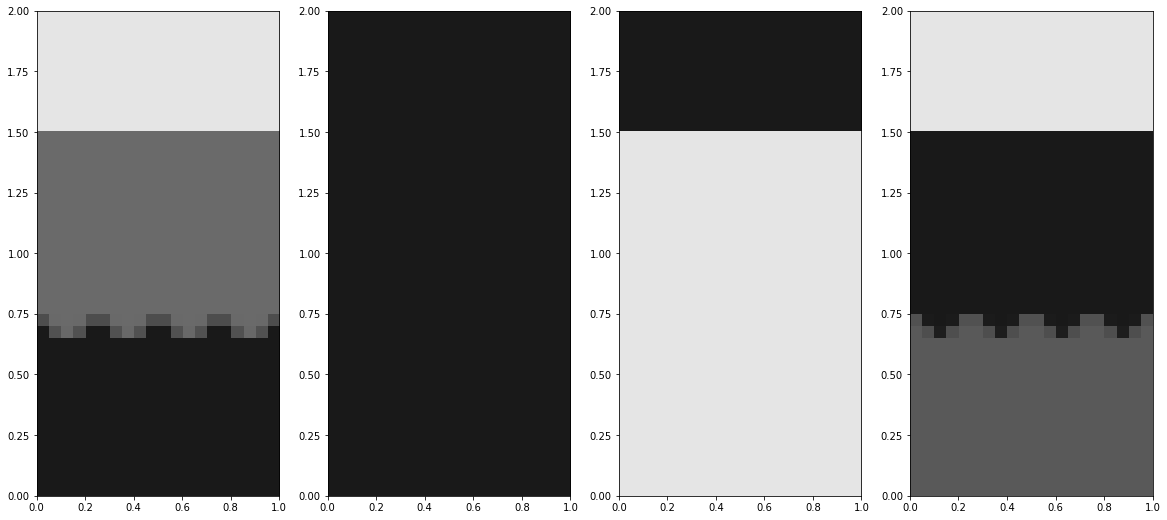

In [13]:
plotTime(0)

Построим графики для следующих моментов времени:

t = 0.0025


<Figure size 432x288 with 0 Axes>

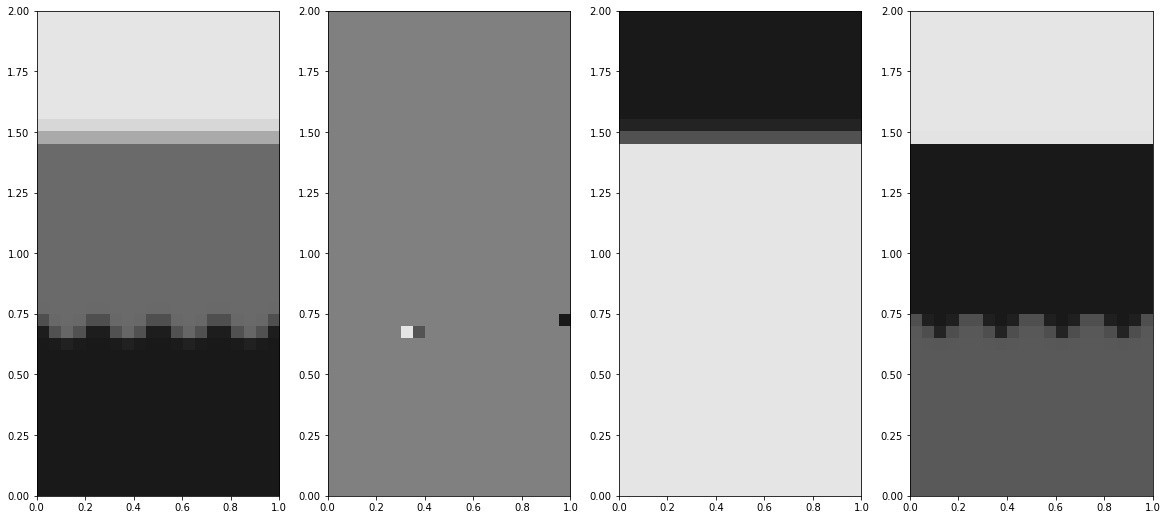

In [14]:
plotTime(plot_time1)

t = 0.0225


<Figure size 432x288 with 0 Axes>

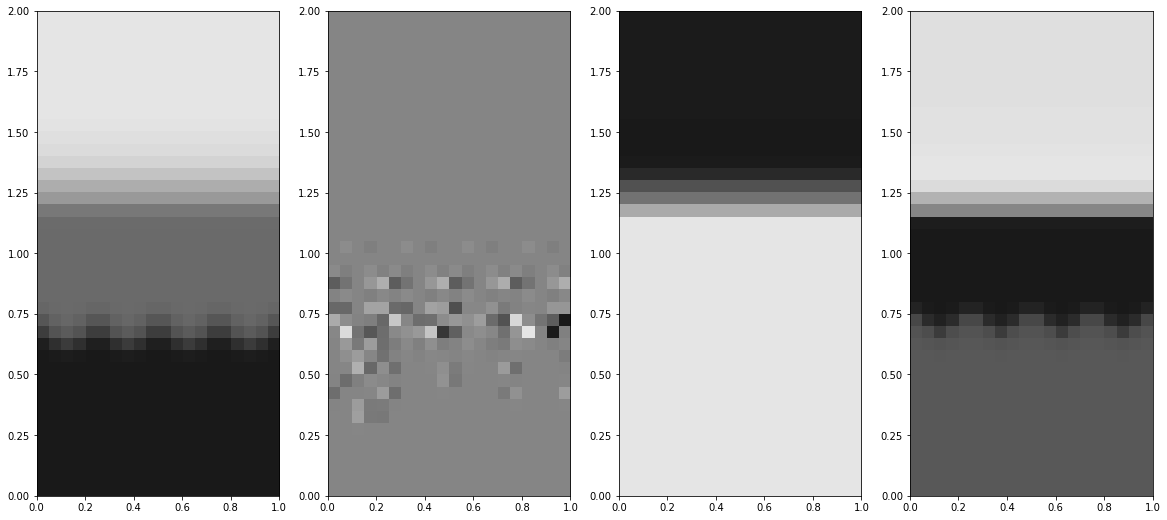

In [15]:
plotTime(plot_time2)

t = 0.0725


<Figure size 432x288 with 0 Axes>

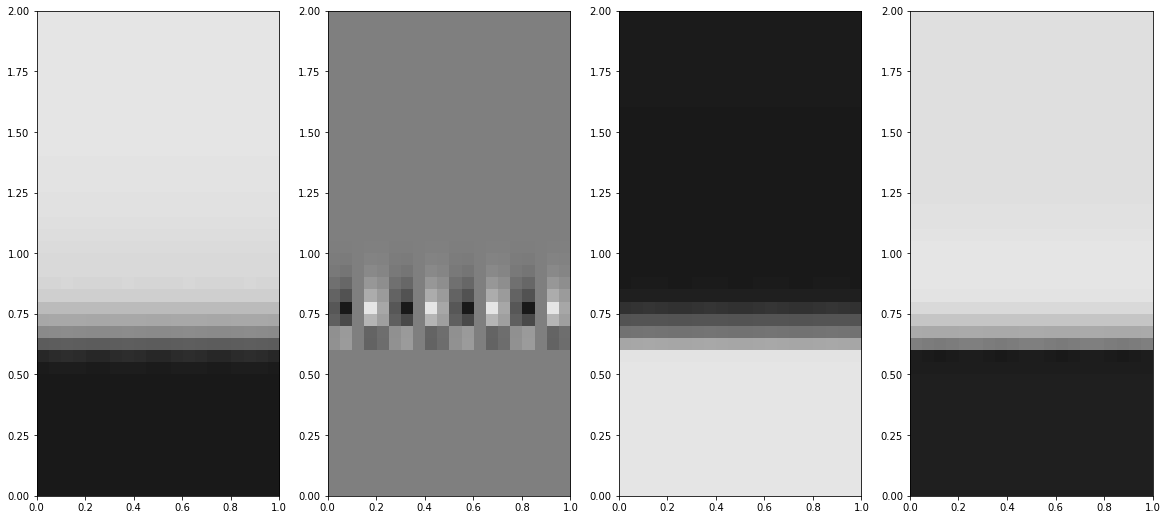

In [16]:
plotTime(plot_time3)

Запустим схему второго порядка точности по пространству и первого по времени:

In [17]:
rho, u, v, eps = solve(orderXY = 2, orderT = 1, Nx = Nx, Ny = Ny, Nt = Nt, T = T, gamma = gamma, rho2 = 1, eps2 = 1, rho3 = rho3, M = M, alpha = alpha, n = n)

0 %
3 %
6 %
10 %
13 %
17 %
20 %
24 %
27 %
31 %
34 %
37 %
41 %
44 %
48 %
51 %
55 %
58 %
62 %
65 %
68 %
72 %
75 %
79 %
82 %
86 %
89 %
93 %
96 %
Done!


Построим графики для следующих моментов времени:

t = 0.0025


<Figure size 432x288 with 0 Axes>

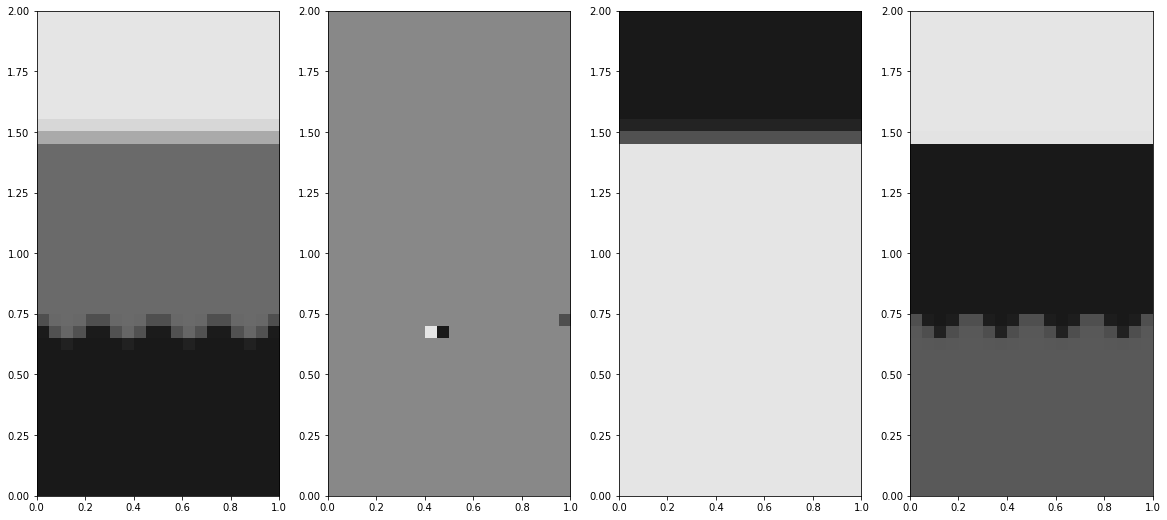

In [18]:
plotTime(plot_time1)

t = 0.0225


<Figure size 432x288 with 0 Axes>

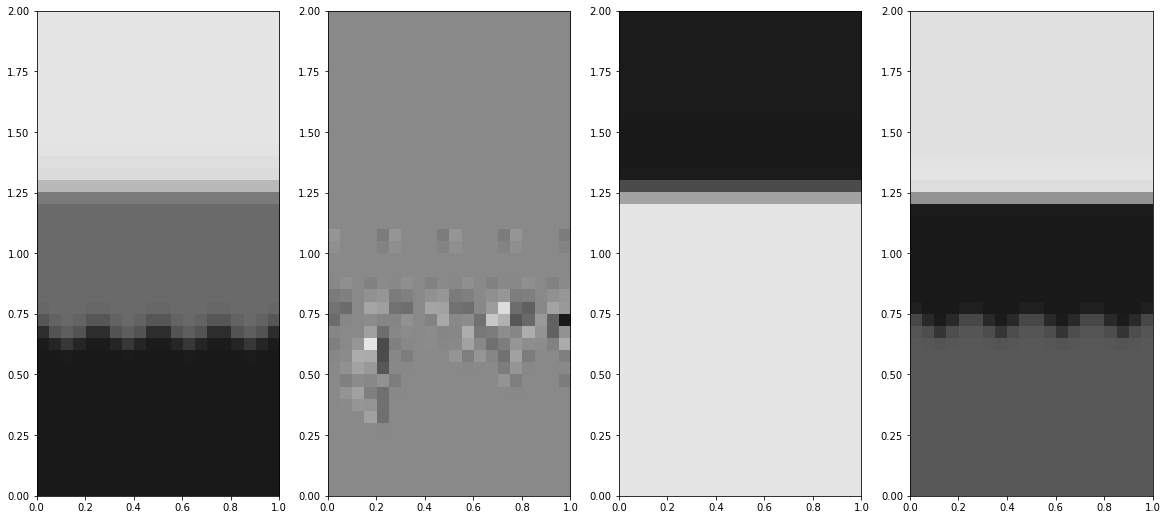

In [19]:
plotTime(plot_time2)

t = 0.0725


<Figure size 432x288 with 0 Axes>

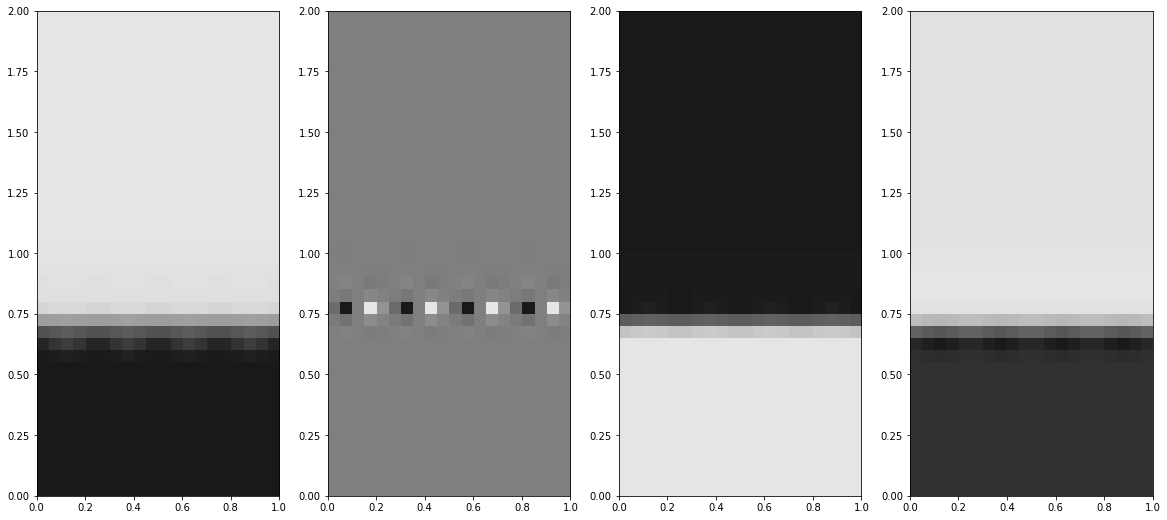

In [20]:
plotTime(plot_time3)

Запустим схему второго порядка точности по времени и пространству:

In [21]:
rho, u, v, eps = solve(orderXY = 2, orderT = 2, Nx = Nx, Ny = Ny, Nt = Nt, T = T, gamma = gamma, rho2 = 1, eps2 = 1, rho3 = rho3, M = M, alpha = alpha, n = n)

0 %
1 %
3 %
5 %
6 %
8 %
10 %
12 %
13 %
15 %
17 %
18 %
20 %
22 %
24 %
25 %
27 %
29 %
31 %
32 %
34 %
36 %
37 %
39 %
41 %
43 %
44 %
46 %
48 %
50 %
51 %
53 %
55 %
56 %
58 %
60 %
62 %
63 %
65 %
67 %
68 %
70 %
72 %
74 %
75 %
77 %
79 %
81 %
82 %
84 %
86 %
87 %
89 %
91 %
93 %
94 %
96 %
98 %
Done!


Построим графики для следующих моментов времени:

t = 0.0025


<Figure size 432x288 with 0 Axes>

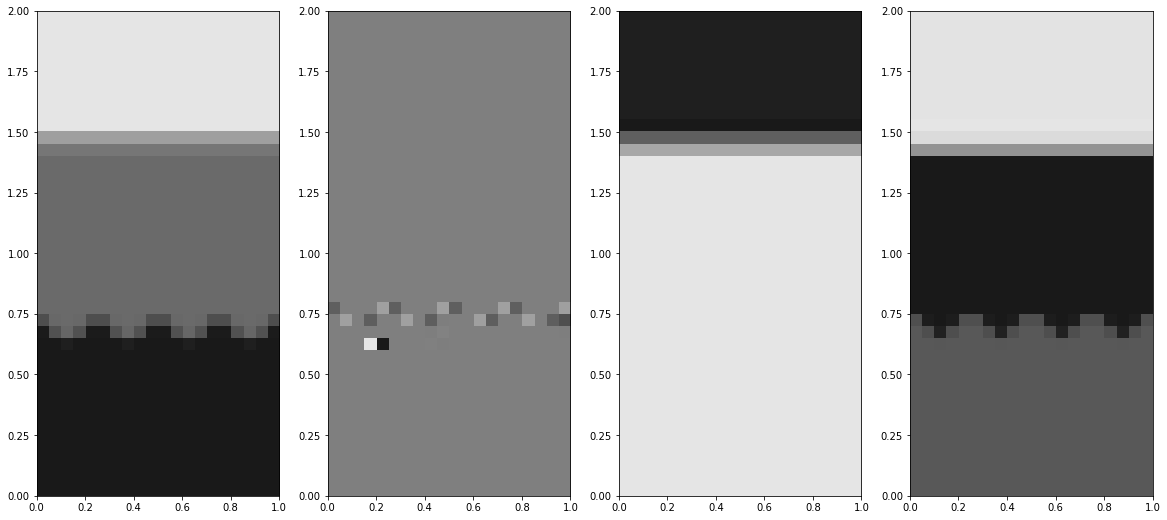

In [22]:
plotTime(plot_time1)

t = 0.0225


<Figure size 432x288 with 0 Axes>

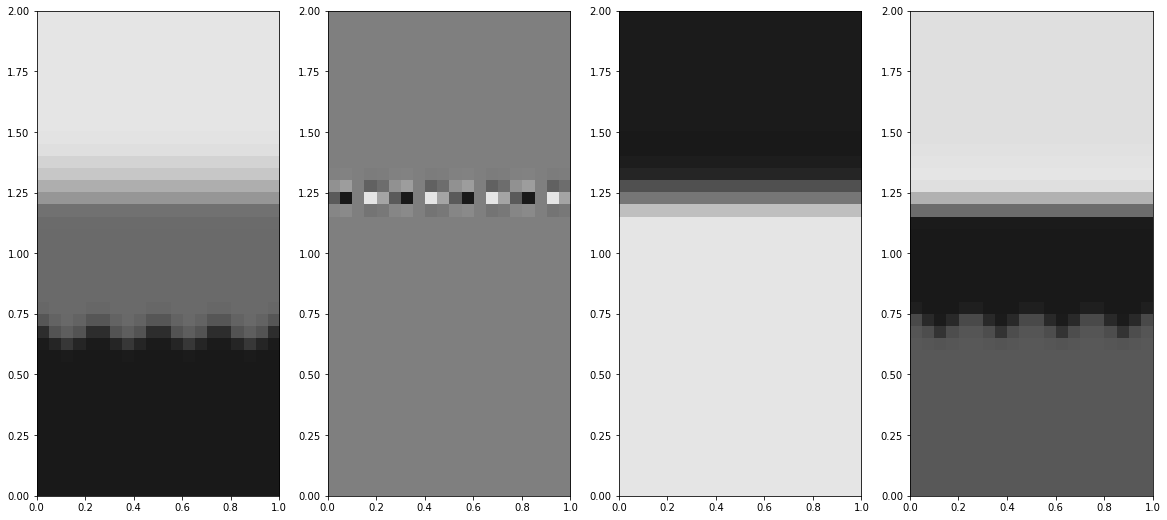

In [23]:
plotTime(plot_time2)

t = 0.0725


<Figure size 432x288 with 0 Axes>

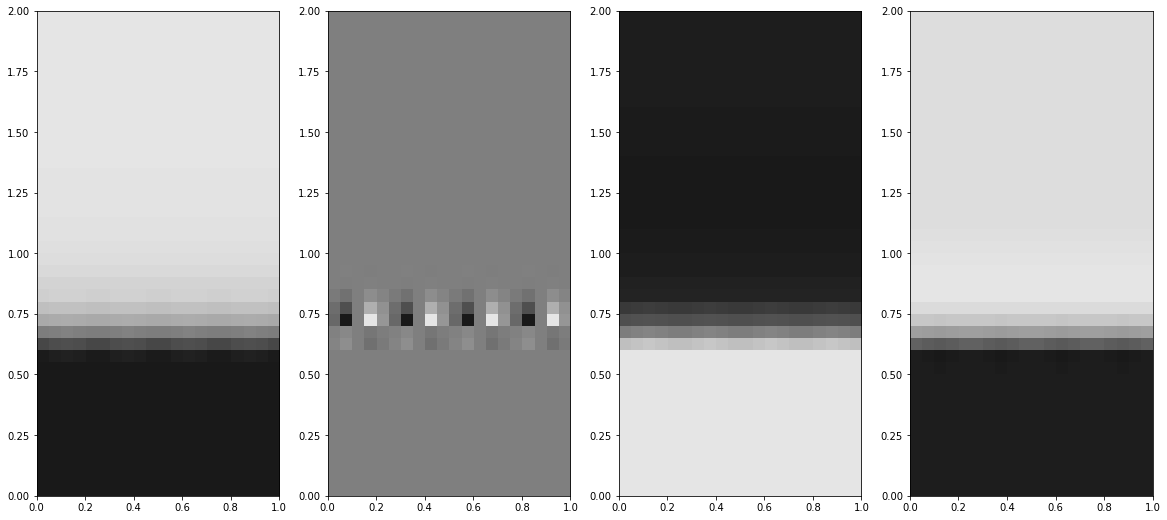

In [24]:
plotTime(plot_time3)

Будем измельчать сетку до тех пор, пока средний модуль разности между решениями первого и второго порядка точности не будет превышать пороговое значение:

In [25]:
# измельчаем, пока не выполнится
# mean(|rho_1 - rh0_2| + mean(|u_1 - u_2| + mean(|v_1 - v_2| + mean(|eps_1 - eps_2|) < lim_val
def subdiv(lim_val):
    nx, ny, nt, tmax = 10, 20, 10, T / 2
    print('Size:', nx, 'x', ny, 'x', nt)
    r1, u1, v1, e1 = solve(orderXY = 1, orderT = 1, Nx = nx, Ny = ny, Nt = nt, T = tmax, gamma = gamma, rho2 = 1, eps2 = 1, rho3 = rho3, M = M, alpha = alpha, n = n)
    
    while True:
        nx, ny, nt = 2 * nx, 2 * ny, 2 * nt
        print('Size:', nx, 'x', ny, 'x', nt)
        r2, u2, v2, e2 = solve(orderXY = 1, orderT = 1, Nx = nx, Ny = ny, Nt = nt, T = tmax, gamma = gamma, rho2 = 1, eps2 = 1, rho3 = rho3, M = M, alpha = alpha, n = n)
        
        diffR = np.abs(r1 - r2[::2,::2,::2]).mean()
        diffU = np.abs(u1 - u2[::2,::2,::2]).mean()
        diffV = np.abs(v1 - v2[::2,::2,::2]).mean()
        diffE = np.abs(e1 - e2[::2,::2,::2]).mean()
        diff = diffR + diffU + diffV + diffE
        
        print('Difference rho:', diffR)
        print('Difference u:', diffU)
        print('Difference v:', diffV)
        print('Difference eps:', diffE)
        print('Total difference:', diff)
        
        if diff < lim_val:
            print('Done!')
            return r1, u1, v1, e1, r2, u2, v2, e2
        
        r1, u1, v1, e1 = r2, u2, v2, e2

In [27]:
r1, u1, v1, e1, r2, u2, v2, e2 = subdiv(1.24)

Size: 10 x 20 x 10
0 %
11 %
22 %
33 %
44 %
55 %
66 %
77 %
88 %
Done!
Size: 20 x 40 x 20
0 %
5 %
10 %
15 %
21 %
26 %
31 %
36 %
42 %
47 %
52 %
57 %
63 %
68 %
73 %
78 %
84 %
89 %
94 %
Done!
Difference rho: 0.05669279300173686
Difference u: 9.959634879585306e-09
Difference v: 0.19526547855395407
Difference eps: 0.9948895732509406
Total difference: 1.2468478547662665
Size: 40 x 80 x 40
0 %
2 %
5 %
7 %
10 %
12 %
15 %
17 %
20 %
23 %
25 %
28 %
30 %
33 %
35 %
38 %
41 %
43 %
46 %
48 %
51 %
53 %
56 %
58 %
61 %
64 %
66 %
69 %
71 %
74 %
76 %
79 %
82 %
84 %
87 %
89 %
92 %
94 %
97 %
Done!
Difference rho: 0.0390743339907364
Difference u: 2.5850261671689367e-12
Difference v: 0.12275980727124097
Difference eps: 0.6100513128446586
Total difference: 0.771885454109221
Done!


Построим графики полученных решений. Как видно, графики почти не отличаются, кроме небольших помех по горизонтальной скорости.

t = 0.0475


<Figure size 432x288 with 0 Axes>

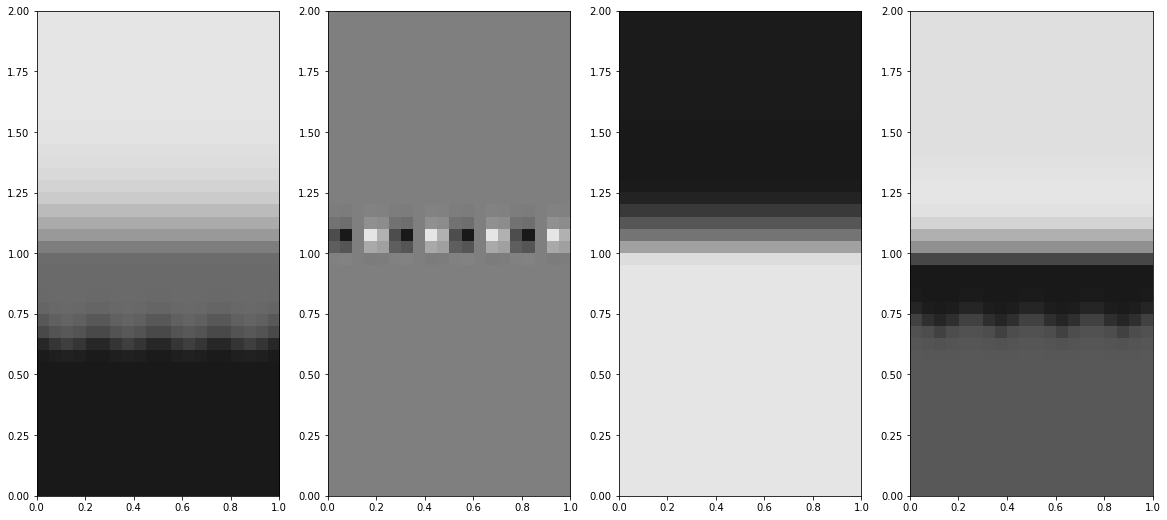

In [28]:
rho, u, v, eps = r1, u1, v1, e1
plotTime(rho.shape[0] - 1)

t = 0.09749999999999999


<Figure size 432x288 with 0 Axes>

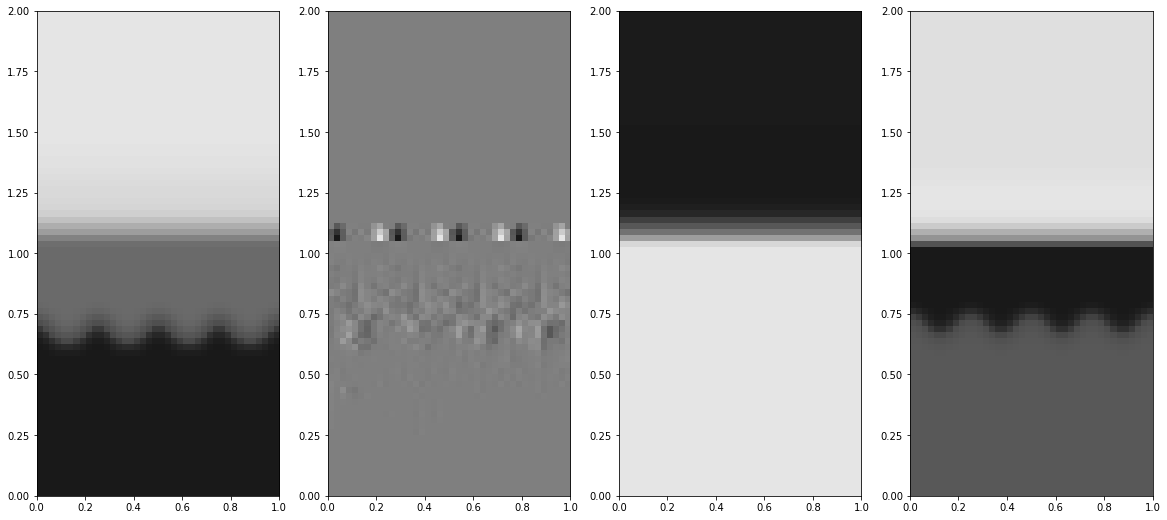

In [29]:
rho, u, v, eps = r2, u2, v2, e2
plotTime(rho.shape[0] - 1)